In [ ]:
import andi
import numpy as np
import csv as csv
import numpy as np

from sklearn.metrics import mean_absolute_error
import tensorflow as tf



import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import SGD
from keras import losses, metrics

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import SimpleRNN
from keras.layers import LSTM

from keras.layers import Dropout
from keras.layers import Bidirectional
#from keras.models import load_model
from tensorflow.keras.models import load_model
import os
from matplotlib import pyplot as plt
#from data_split import data_split
from many_net import many_net, many_net_diffv, many_net_only_diff, many_net_odcv_hd, many_net_only_diff_cont_varc, many_net_only_diff_cont_varc_2d_4_3d, many_net_only_diff_cont_varc_dim

In [3]:
os.getcwd()

'/Users/stefabo/Documents/GitHub/eduRNN'

Importing the data

In [2]:
import csv
trajs_from_files = csv.reader(open('challenge_for_scoring/task1.txt','r'), delimiter=';', 
                                        lineterminator='\n',quoting=csv.QUOTE_NONNUMERIC)
validation = [[],[],[]]
for trajs in enumerate(trajs_from_files):
    validation[int(trajs[1][0])-1].append(trajs[1][1:])

In [8]:
len(validation[0])

10000

In [4]:
#checking trajectory lengths
trl=[]
for traj in validation[0]:
    trl.append(len(traj))

In [6]:
np.min(trl)

10

(array([1023., 1016.,  980.,  995., 1006.,  999.,  983.,  973., 1035.,
         990.]),
 array([ 10. , 108.9, 207.8, 306.7, 405.6, 504.5, 603.4, 702.3, 801.2,
        900.1, 999. ]),
 <a list of 10 Patch objects>)

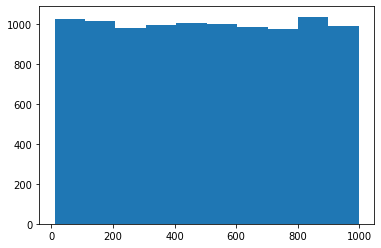

In [7]:
plt.hist(trl)

Importing the networks

In [4]:
centers1d =[25, 50, 65, 75, 125, 165, 225, 325, 425, 525, 625, 725, 825, 925]
meta_model1d=[]
for i in centers1d: #NB I should go the whole way to 925 and use 25 and 60
    m=load_model('Model_1D_recdout_'+str(i)+'.h5')
    #m=tf.keras.models.load_model('Model_1D_recdout_'+str(i)+'.h5')


    meta_model1d.append(m)
    

In [ ]:
predictions1d=many_net_only_diff_cont_varc(meta_model1d,validation[0],centers=centers1d)

In [ ]:
np.save('task1_pred_1d_all.npy',predictions1d)

One could also use

In [4]:
a, predictions1d_check=many_net_odcv_hd(meta_model,validation[0],
                 centers=centers,
                 dim=1,thr=1e-12,skip=[],min_tr=0,max_tr=1000)

IndexError: index 3 is out of bounds for axis 0 with size 1

In [12]:
np.save('task1_pred_1d_difference.npy',predictions1d_check-predictions1d)

# 2d case

In [ ]:
a, predictions2d_u1d=many_net_odcv_hd(meta_model1d,validation[1],
                 centers=centers1d,
                 dim=2,thr=1e-12,skip=[],min_tr=0,max_tr=1000)

In [ ]:
np.save('task1_pred_2d_u1d_all.npy',predictions2d_u1d)

In [ ]:
predictions2d_u1d.shape

In [ ]:
a3, predictions3d_u1d=many_net_odcv_hd(meta_model1d,validation[2],
                 centers=centers1d,
                 dim=3,thr=1e-12,skip=[],min_tr=0,max_tr=1000)

In [ ]:
np.save('task1_pred_3d_u1d_all.npy',predictions3d_u1d)

In [6]:
pred_to_txt = np.ones((len(predictions), 2))
pred_to_txt[:, 1] = predictions

np.savetxt('task1.txt', pred_to_txt.astype(float), fmt = '%1.5f', delimiter = ';')

In [10]:
predictions_nois=predictions+np.random.normal(0.05,len(predictions))

In [11]:
pred_to_txt = np.ones((len(predictions_nois), 2))
pred_to_txt[:, 1] = predictions

np.savetxt('task1.txt', pred_to_txt.astype(float), fmt = '%1.5f', delimiter = ';')

In [14]:
predictions_task1=[np.ones(2),predictions2d,predictions3d]

In [15]:
pred_to_txt_fin=np.genfromtxt('task1.txt', delimiter = ';')
for dim in [2,3]:
    
    pred_to_txt_temp = dim*np.ones((len(predictions_task1[dim-1]), 2))
    pred_to_txt_temp[:, 1] = predictions_task1[dim-1]
    pred_to_txt_fin=np.concatenate((pred_to_txt_fin,pred_to_txt_temp))
np.savetxt('task1_pro.txt', pred_to_txt_fin.astype(float), fmt = '%1.5f', delimiter = ';')